### In the Below we make a density of states python code using retarded Green's Function and Tight Binding Hamiltonian approach for 1d Chain.

#### Tight Binding Hamiltonian form:

$H = \sum_{k} \ket{k}\bra{k} - t\sum_{k} \left(\ket{k}\bra{k+1} + \ket{k+1}\bra{k}\right)$

#### Green Function Formula or Density of states formula:

$
\rho(E) = -\frac{1}{\pi} \, \mathrm{Im} \left[ \mathrm{Tr} \left( (E + i\eta - H)^{-1} \right) \right]
$

#### Code Explanation of the Hamitonian Part:

Here we use simple numpy np.full and np.diag commands to build the Hamiltonian as it is very simple system we did not face any kind of problem, but when we move to better or complex system in that case we have to build a better for loop type system to build the Hamiltonian, also we use simple numpy built in function for the Linear Algebra things and this is not very efficient, to make it optimize we can use the scipy sparse matrix module to have some computational edge.







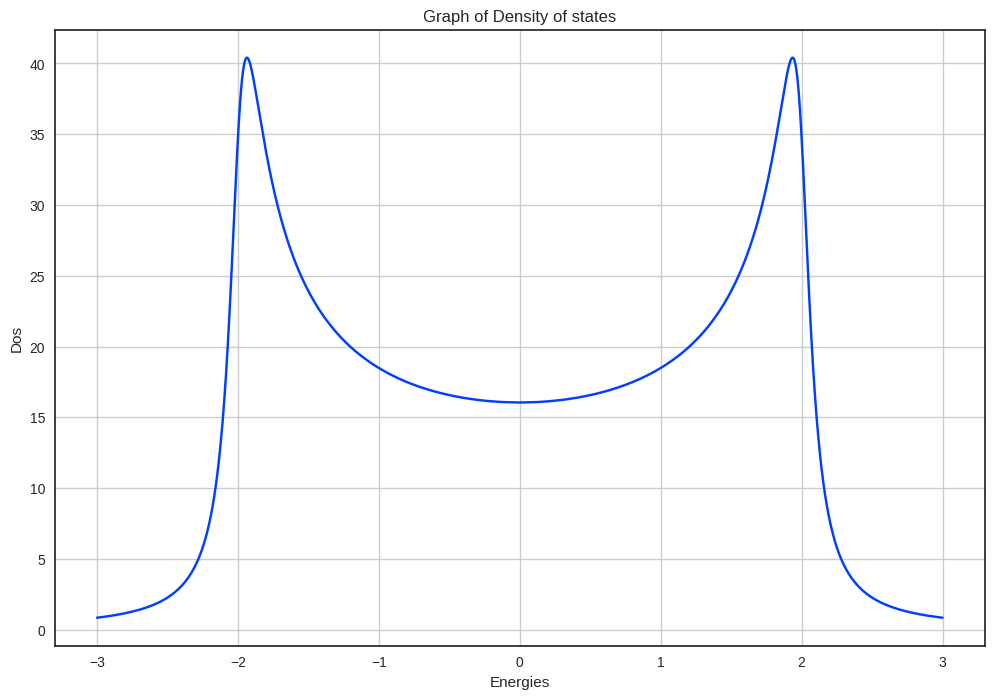

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
#Physical Parameters
epsilon = 0.0
N = 100 #Number of Sites
t1 = 1.0 #hopping Term
eta = 0.1
#Hamiltonian Construction
H = np.full(N,epsilon) #This makes a array(1d) with same elements 'epsilon'
H1 = np.diag(H) #This will put that 1d array of H to the diagonals, the shape will converted to a 2d array(Matrix) with same shape of the 1d.
t = np.full(N-1,t1) 
tmat1 = np.diag(t,k = +1) #K value decides the diagonal, k = 0 main diagonal, k = +1 or -1 decides the diagonal right below or above the main diagonal.
tmat2 = np.diag(t,k = -1)
Hfin = H1 + tmat1 + tmat2 #Adding to construct the matrix.
#DOS calculation
#First we will create an energy array
eng = np.linspace(-3,3,2000)
dos = np.zeros_like(eng) #Making an empty array of same shape as energy to store the values
#Now we will create and identity matrix for Greens function calculation as H is a matrix
I = np.identity(N,dtype = complex)
#Now we will write the Dos part
for m, E in enumerate(eng): #m is indexing the value, for every E there is DOS which is going to store in the empty array we create earlier.
    gmat = (E + 1j*eta)*I - Hfin 
    ginv = np.linalg.inv(gmat)

    dos[m] = (-1/np.pi)*np.imag(np.trace(ginv))

plt.figure(figsize = (12,8))

plt.xlabel('Energies')
plt.ylabel('Dos')
plt.title('Graph of Density of states')
plt.plot(eng,dos)

plt.grid(True)

Now we can change the above example into the for loop as The way we formulated is not optimized enough...


[[0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]]


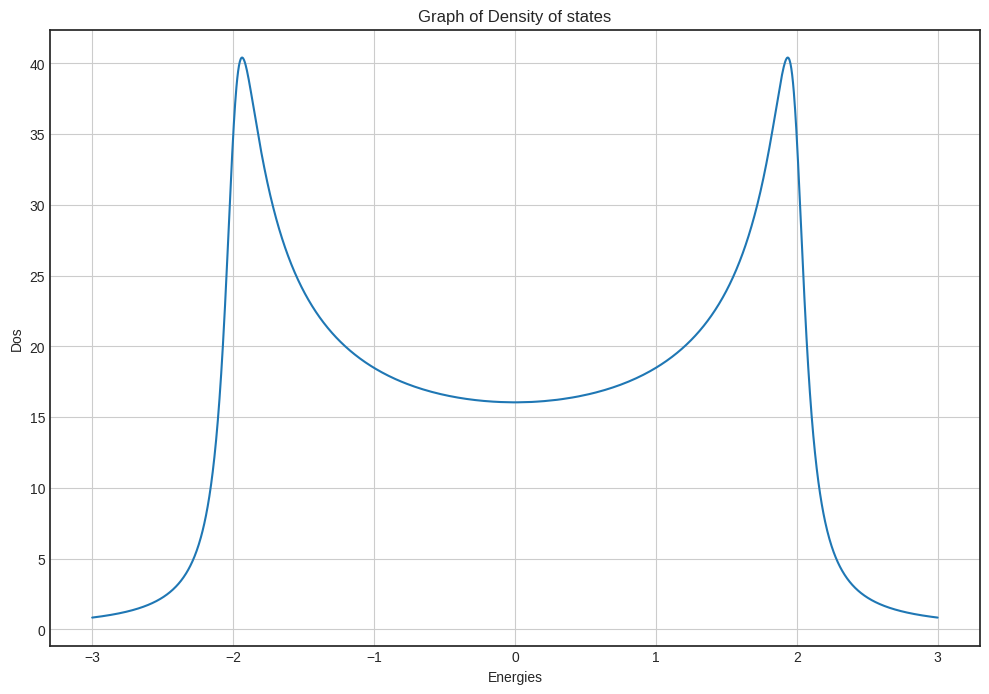

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
#Physical Parameters
epsilon = 0.0
N = 100 #Number of Sites
t1 = 1.0 #hopping Term
eta = 0.1
#Hamiltonian Construction by using for loop, the rest of the code is same.
H = np.zeros((N,N), dtype = complex)

for i in range(N):
    for j in range(N):
        if i == j:
            H[i,j] = epsilon
        elif np.abs(i-j) == 1: #Takingh absolute value here
            H[i,j] = t1
        else:
             H[i,j] = 0.0

print(H)
#DOS calculation
#First we will create an energy array
eng = np.linspace(-3,3,2000)
dos = np.zeros_like(eng) #Making an empty array of same shape as energy to store the values
#Now we will create and identity matrix for Greens function calculation as H is a matrix
I = np.identity(N,dtype = complex)
#Now we will write the Dos part
for m, E in enumerate(eng): #m is indexing the value, for every E there is DOS which is going to store in the empty array we create earlier.
    gmat = (E + 1j*eta)*I - H
    ginv = np.linalg.inv(gmat)

    dos[m] = (-1/np.pi)*np.imag(np.trace(ginv))

plt.figure(figsize = (12,8))

plt.xlabel('Energies')
plt.ylabel('Dos')
plt.title('Graph of Density of states')
plt.plot(eng,dos)

plt.grid(True)

##### Now we will move to the binary chain, here the value of epsilon (On site potential) remains fixed, we just alternatively changes the hopping term, 

[[0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 2.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 2.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]]


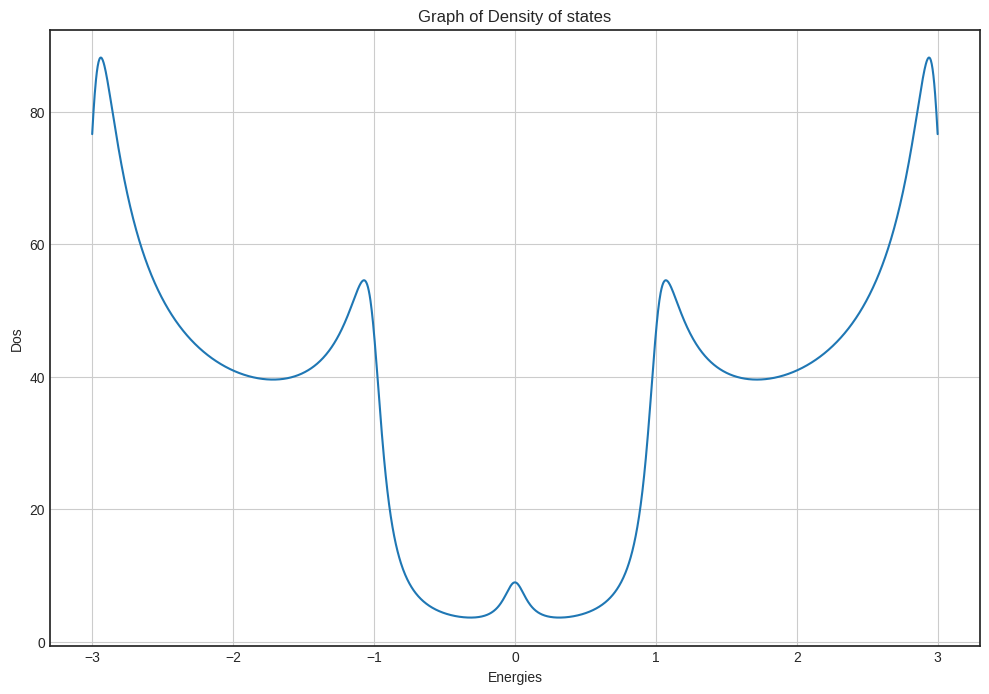

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
#Physical Parameters
epsilon = 0.0
N = 250 #Number of Sites
t1 = 1.0 #hopping Term
t2 = 2.0
eta = 0.1
#Hamiltonian Construction by using for loop, the rest of the code is same.
H = np.zeros((N,N), dtype = complex)

for i in range(N):
    H[i,i] = epsilon
    for j in range(N-1):
         if j % 2 == 0:
              H[j, j+1] = t1
              H[j+1, j] = t1
         else:
              H[j, j+1] = t2 
              H[j+1, j] = t2
           
print(H)
#DOS calculation
#First we will create an energy array
eng = np.linspace(-3,3,2000)
dos = np.zeros_like(eng) #Making an empty array of same shape as energy to store the values
#Now we will create and identity matrix for Greens function calculation as H is a matrix
I = np.identity(N,dtype = complex)
#Now we will write the Dos part
for k, E in enumerate(eng): #m is indexing the value, for every E there is DOS which is going to store in the empty array we create earlier.
    gmat = (E + 1j*eta)*I - H
    ginv = np.linalg.inv(gmat)

    dos[k] = (-1/np.pi)*np.imag(np.trace(ginv))

plt.figure(figsize = (12,8))

plt.xlabel('Energies')
plt.ylabel('Dos')
plt.title('Graph of Density of states')
plt.plot(eng,dos)

plt.grid(True)

### Now the abover code can be formulated into the Scipy sparse matrix format as most of the element of the matrix is zero...

In [ ]:
import scipy.linalg as scl
